In [4]:
'''
scipy入门
傅里叶变换：将数据由现象变成本质 本节课应用：图片消噪
物理世界中，所有东西都是粒子组成，数学世界中，都是方程组成

4.图片不平滑：
噪声----->白色圆环
数据不平滑---->不协调波动大
傅里叶变换，时域-----》频域
过滤掉波动大的数据，保留自然数据
高等算法，处理数据
'''

'\nscipy入门\n傅里叶变换：将数据由现象变成本质 本节课应用：图片消噪\n物理世界中，所有东西都是粒子组成，数学世界中，都是方程组成\n\n4.图片不平滑：\n噪声----->白色圆环\n数据不平滑---->不协调波动大\n傅里叶变换，时域-----》频域\n过滤掉波动大的数据，保留自然数据\n高等算法，处理数据\n'

In [5]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2,ifft2 #处理图片,反转
%matplotlib inline


In [6]:
#查看版本
sp.__version__

'1.2.1'

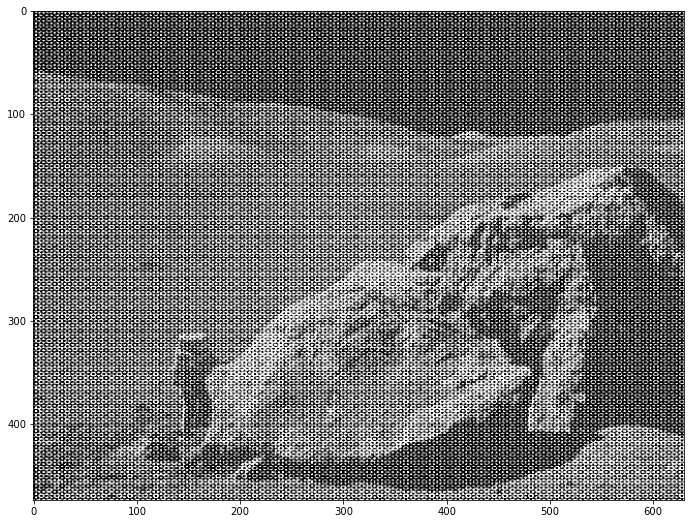

In [7]:
moon = plt.imread('./moonlanding.png')
#尺寸放大
plt.figure(figsize=(12,9))
#cmap设置变成黑白
plt.imshow(moon,cmap = plt.cm.gray)

In [8]:
moon_fft = fft2(moon)
moon_fft

array([[126598.45      +0.j       ,  -4608.5796 -1892.4688j   ,
          -322.093    -20.27744j  , ...,   -906.1585 +1539.3081j   ,
          -322.093    +20.27744j  ,  -4608.5796 +1892.4688j   ],
       [ -9421.1    +5242.1133j   ,   5224.016  -3171.7434j   ,
          1607.9927 +1269.4243j   , ...,   -677.34503 -936.16174j  ,
           354.6247 -1003.8348j   ,   1965.366  -2188.0593j   ],
       [ -2928.3513 +7280.916j    ,  -1116.4065 +1338.3179j   ,
          -474.20056 +385.40216j  , ...,    239.7723  -977.2129j   ,
          1582.9283  -261.95346j  ,   2641.927   -292.09366j  ],
       ...,
       [  1850.5718 -2451.1787j   ,   -781.0807   +13.744501j ,
           377.90707  +12.6699295j, ...,  -1526.7869 +1271.2621j   ,
         -2705.5718 -3488.529j    ,   1897.404  -2281.9092j   ],
       [ -2928.3513 -7280.916j    ,   2641.927   +292.09366j  ,
          1582.9283  +261.95346j  , ...,  -2208.4302   +81.807434j ,
          -474.20056 -385.40216j  ,  -1116.4065 -1338.3179j   ]

In [9]:
#计算所有数据波动的平均值
np.abs(moon_fft).mean()
#大于十倍平均值认为波动大，要过滤掉 就是大于500
cond = np.abs(moon_fft) > 500
cond

array([[ True,  True, False, ...,  True, False,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True, False, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [10]:
#相当于过滤然后输出了0
moon_fft[cond] = 0
moon_fft

array([[   0.      +0.j       ,    0.      +0.j       ,
        -322.093  -20.27744j  , ...,    0.      +0.j       ,
        -322.093  +20.27744j  ,    0.      +0.j       ],
       [   0.      +0.j       ,    0.      +0.j       ,
           0.      +0.j       , ...,    0.      +0.j       ,
           0.      +0.j       ,    0.      +0.j       ],
       [   0.      +0.j       ,    0.      +0.j       ,
           0.      +0.j       , ...,    0.      +0.j       ,
           0.      +0.j       ,    0.      +0.j       ],
       ...,
       [   0.      +0.j       ,    0.      +0.j       ,
         377.90707+12.6699295j, ...,    0.      +0.j       ,
           0.      +0.j       ,    0.      +0.j       ],
       [   0.      +0.j       ,    0.      +0.j       ,
           0.      +0.j       , ...,    0.      +0.j       ,
           0.      +0.j       ,    0.      +0.j       ],
       [   0.      +0.j       ,    0.      +0.j       ,
           0.      +0.j       , ...,    0.      +0.j       ,
 

In [11]:
#用ifft将频域转换成时域
moon_result = ifft2(moon_fft)
moon_result

array([[-0.2158841 -2.04028751e-18j,  0.08547963-4.68620217e-17j,
        -0.17341562-2.19494981e-18j, ...,  0.00313992-8.68569686e-17j,
        -0.1262884 +2.47265097e-17j, -0.12006474-3.97772495e-17j],
       [-0.07464715-5.88788566e-18j,  0.02630262-1.89030804e-17j,
        -0.05795981+1.61336566e-17j, ..., -0.10645279-7.18168186e-19j,
        -0.10607974+6.10424153e-17j, -0.06213436+1.26256489e-17j],
       [ 0.01300102+6.62601036e-18j, -0.04392404+2.84434623e-17j,
        -0.03069701-5.12162690e-18j, ..., -0.09355526+5.24896557e-17j,
        -0.09281505+2.55608587e-17j,  0.0542773 -1.23943340e-16j],
       ...,
       [ 0.00554965-1.79522115e-17j, -0.06839301-2.70960910e-17j,
        -0.11348293+2.29835194e-17j, ...,  0.05521014-2.17899689e-17j,
        -0.02254207+6.09597568e-17j,  0.17004317-1.91615926e-16j],
       [-0.0236596 +2.10204957e-17j, -0.21761242+4.17099670e-17j,
        -0.04112267+3.82396730e-17j, ..., -0.03240317+5.62784696e-18j,
        -0.03881308+4.02020432e-17j

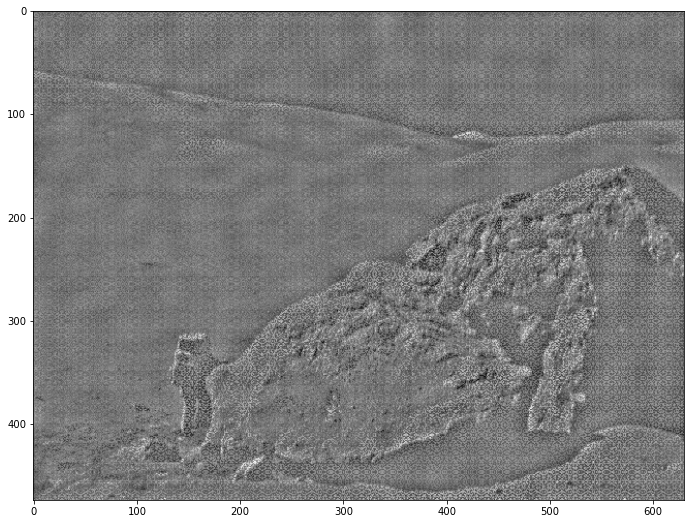

In [18]:
moon2 =np.real(moon_result)
moon2.shape
plt.figure(figsize=(12,9))
plt.imshow(moon2,cmap= plt.cm.gray)

In [13]:
moon3 = np.abs(moon2)


In [14]:
#######################################################
#使用io保存数据
from scipy import io

In [15]:
io.savemat('moon.mat',mdict={'moon':moon2})

In [16]:
io.loadmat('./moon.mat')

{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Wed Sep 23 15:24:34 2020',
 '__version__': '1.0',
 '__globals__': [],
 'moon': array([[-0.2158841 ,  0.08547963, -0.17341562, ...,  0.00313992,
         -0.1262884 , -0.12006474],
        [-0.07464715,  0.02630262, -0.05795981, ..., -0.10645279,
         -0.10607974, -0.06213436],
        [ 0.01300102, -0.04392404, -0.03069701, ..., -0.09355526,
         -0.09281505,  0.0542773 ],
        ...,
        [ 0.00554965, -0.06839301, -0.11348293, ...,  0.05521014,
         -0.02254207,  0.17004317],
        [-0.0236596 , -0.21761242, -0.04112267, ..., -0.03240317,
         -0.03881308,  0.18942517],
        [-0.06233123,  0.06238206, -0.05904231, ..., -0.05108529,
         -0.01733968, -0.04830741]], dtype=float32)}

In [3]:
#读写图片使用misc
from scipy import misc

In [2]:
!pip install scipy==1.2.1


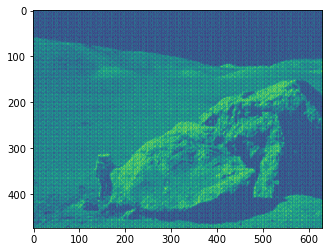

In [24]:
moon4 = misc.imread('./moonlanding.png')
moon4
moon5 = misc.imfilter(moon4,'smooth')
plt.imshow(moon5)